# ALGORITMOS PARA EL VINO

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


# FUNCIONES

## funcion para la matriz de confusion

In [2]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

## Funcion para calcular los resultados de los modelos

In [3]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [4]:
datos = pd.read_csv("winequalityN.csv") 

In [5]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
columnas_con_faltantes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

datos = datos.dropna(subset=columnas_con_faltantes)

<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

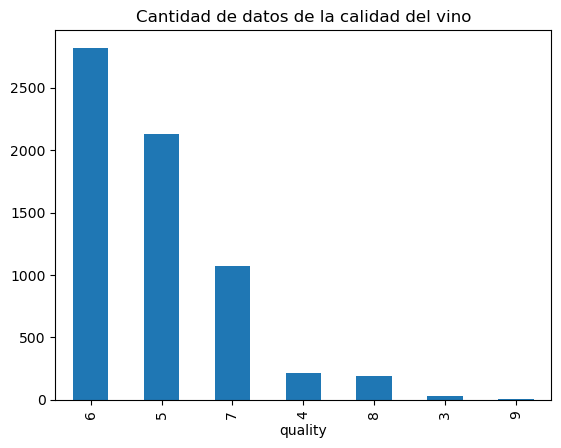

In [7]:
datos["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

In [8]:
datosn=datos[datos['quality'] != 9]

In [9]:
datosn=datosn[datosn['quality'] != 3]

<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

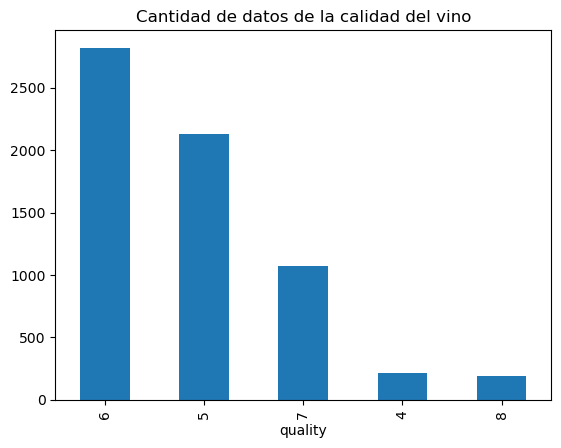

In [10]:
datosn["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')
#plt.savefig("cantidad de datos.eps",format='eps')

In [11]:
datosn.loc[datosn['type'] == 'red', 'type'] = 0
datosn.loc[datosn['type'] == 'white', 'type'] = 1

In [12]:
datosn

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


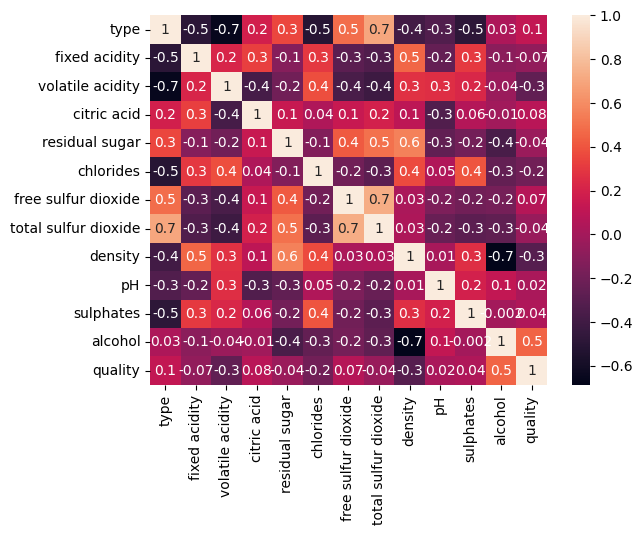

In [125]:
sns.heatmap(datosn.corr(),annot=True,fmt=".0g")
plt.savefig("correlacion.eps",format='eps')

In [13]:
X = datosn.drop('quality', axis=1)
y = datosn['quality']

In [14]:
mean = X.mean(axis=0)
std = X.std(axis=0)
Xn = (X - mean) / std

### separacion de datos, entrenamiento (70%) y validacion (30%)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from imblearn.over_sampling import ADASYN
smote = ADASYN(random_state=42)
Xn, y = smote.fit_resample(Xn, y)
X_train, X_val, y_train, y_val = train_test_split(Xn ,y, test_size=0.3, random_state=42)

In [82]:
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

print("\nForma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (9870, 12)
Forma de y_train: (9870,)

Forma de X_val: (4230, 12)
Forma de y_val: (4230,)


<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

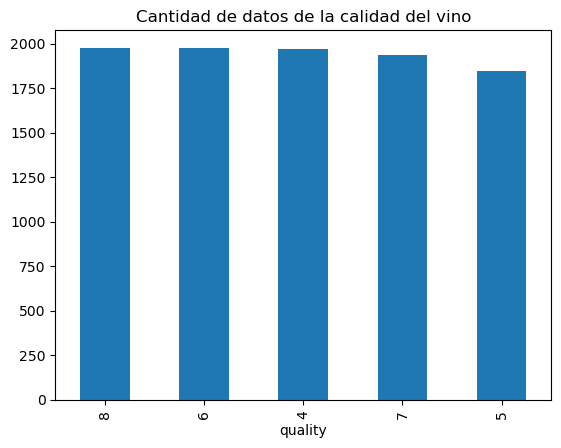

In [16]:
y_train.value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)
best_params = best_model.get_params
best_params

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-packages

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=300, random_state=42)>

In [32]:
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)

<Axes: title={'center': 'validacion'}>

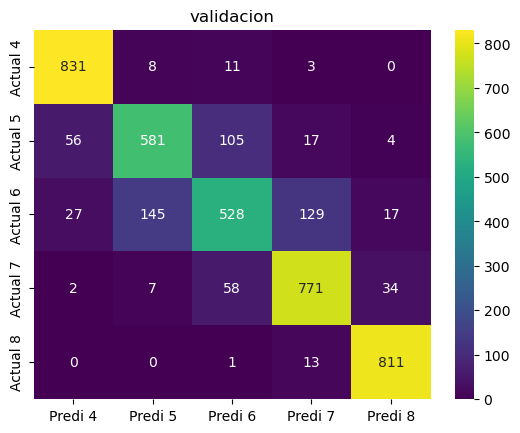

In [33]:
plot(y_val,y_pred_prueba,"validacion")
#plt.savefig("validacionRF.eps",format='eps')

<Axes: title={'center': 'Entrenamiento'}>

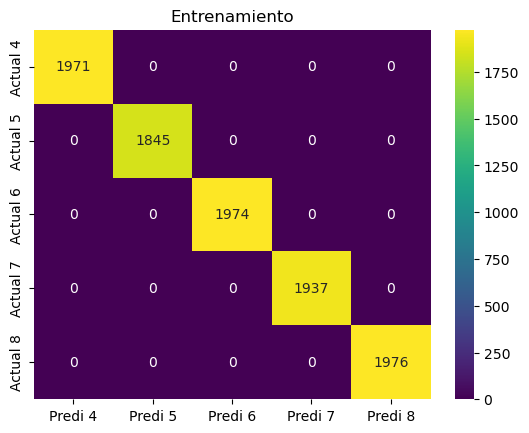

In [34]:
plot(y_train,y_test_prueba,"Entrenamiento")
#plt.savefig("EntrenamientoRF.eps",format='eps')

In [36]:
resultadosModelo(y_val, y_pred_prueba)

Precisión: 0.8468381822553498
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.91      0.97      0.94       853
           5       0.78      0.76      0.77       763
           6       0.75      0.62      0.68       846
           7       0.83      0.88      0.85       872
           8       0.94      0.98      0.96       825

    accuracy                           0.85      4159
   macro avg       0.84      0.85      0.84      4159
weighted avg       0.84      0.85      0.84      4159



Precisión del modelo BaggingClassifier: 0.8278432315460448


<Axes: title={'center': 'Validacion'}>

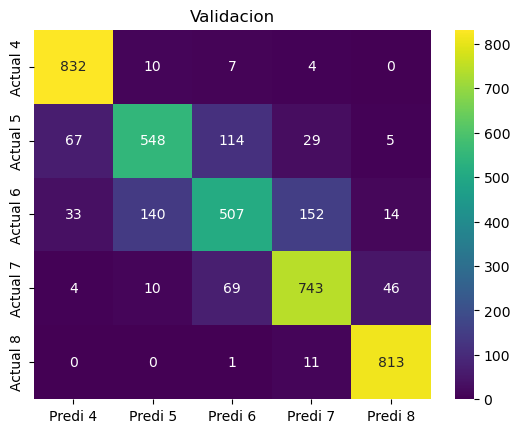

In [35]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

Precisión del modelo AdaBoost: 0.8468381822553498


<Axes: title={'center': 'Validacion'}>

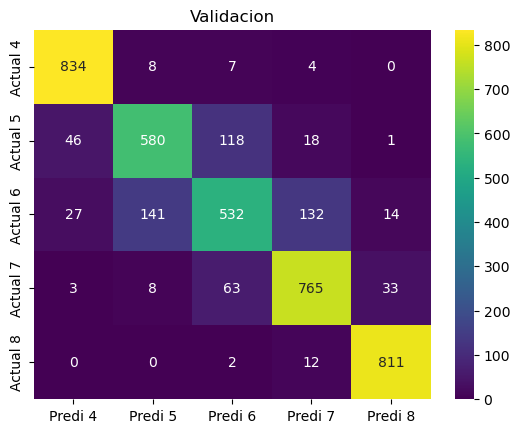

In [37]:
base_classifier = best_model
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_val)
accuracy_AdaBoost = accuracy_score(y_val, y_pred_adaboost )
print(f"Precisión del modelo AdaBoost: {accuracy_AdaBoost}")
plot(y_val,y_pred_adaboost,'Validacion')

# K-NN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [39]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_
best_params

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

<Axes: title={'center': 'validacion'}>

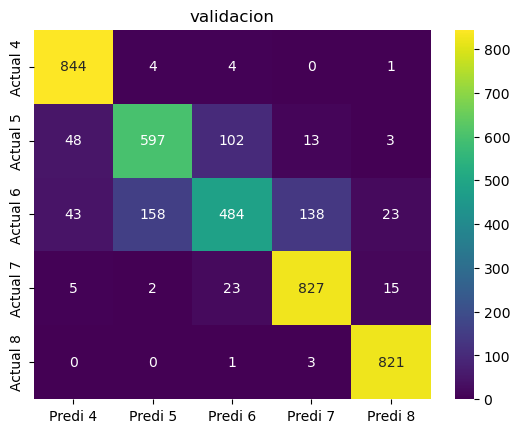

In [43]:
plot(y_val,y_pred_prueba2,"validacion")
#plt.savefig("validacionKm.eps",format='eps')

In [44]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.8591007453714835
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.90      0.99      0.94       853
           5       0.78      0.78      0.78       763
           6       0.79      0.57      0.66       846
           7       0.84      0.95      0.89       872
           8       0.95      1.00      0.97       825

    accuracy                           0.86      4159
   macro avg       0.85      0.86      0.85      4159
weighted avg       0.85      0.86      0.85      4159



Precisión del modelo BaggingClassifier: 0.8485212791536427


<Axes: title={'center': 'Validacion'}>

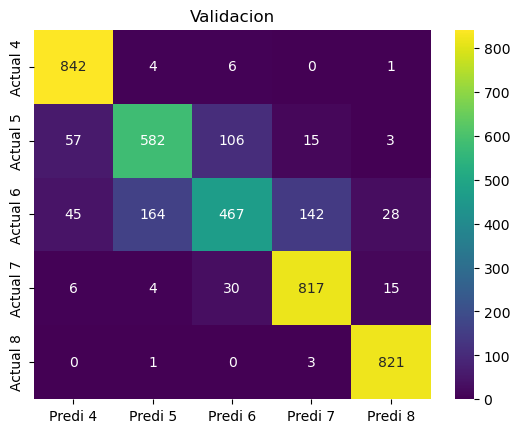

In [42]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

# Arboles de decision

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba3 = best_model.predict(X_val)
y_test_prueba3 = best_model.predict(X_train)
best_params = grid_search.best_params_

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-pac

<Axes: title={'center': 'validacion'}>

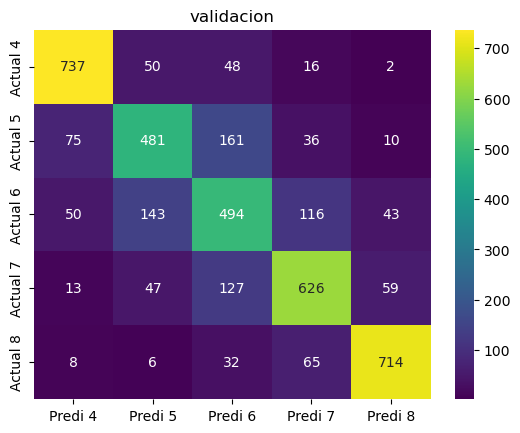

In [48]:
plot(y_val,y_pred_prueba3,"validacion")
#plt.savefig("ArbolesDecisionVal.eps",format='eps')

In [53]:
resultadosModelo(y_val, y_pred_prueba3)

Precisión: 0.7338302476556865
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.83      0.86      0.85       853
           5       0.66      0.63      0.65       763
           6       0.57      0.58      0.58       846
           7       0.73      0.72      0.72       872
           8       0.86      0.87      0.86       825

    accuracy                           0.73      4159
   macro avg       0.73      0.73      0.73      4159
weighted avg       0.73      0.73      0.73      4159



Precisión del modelo BaggingClassifier: 0.8076460687665304


<Axes: title={'center': 'Validacion'}>

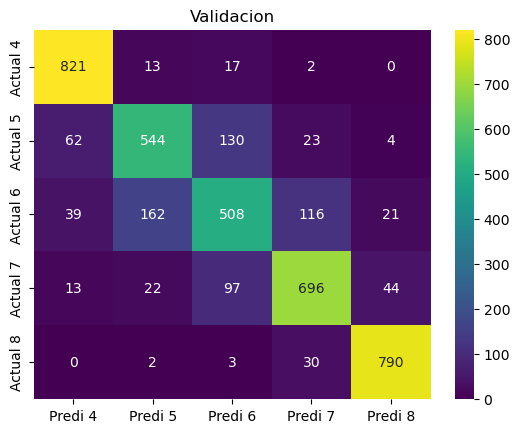

In [51]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

Precisión del modelo AdaBoost: 0.7396008655926906


<Axes: title={'center': 'Validacion'}>

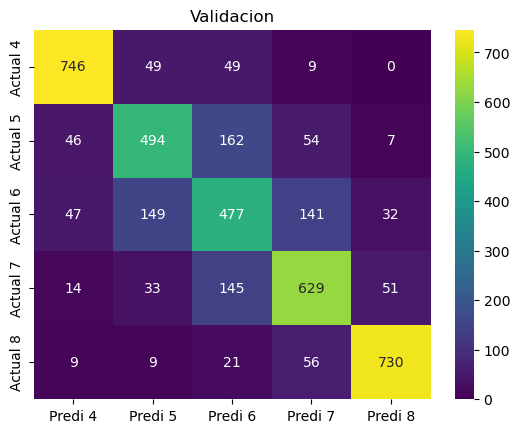

In [52]:
base_classifier = best_model
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_val)
accuracy_AdaBoost = accuracy_score(y_val, y_pred_adaboost )
print(f"Precisión del modelo AdaBoost: {accuracy_AdaBoost}")
plot(y_val,y_pred_adaboost,'Validacion')

# SVC (Support Vector Classifier)

In [54]:
from sklearn.svm import SVC

In [55]:
svm_classifier = SVC(C=10,kernel='rbf',gamma=1,degree=1)
svm_classifier.fit(X_train, y_train)
y_pred_prueba4 = best_model.predict(X_val)
y_test_prueba4 = best_model.predict(X_train)

In [153]:
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [0.001,0.01,0.1,1,10]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba4 = best_model.predict(X_val)
y_test_prueba4 = best_model.predict(X_train)
best_params = grid_search.best_params_

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_con

<Axes: title={'center': 'validacion'}>

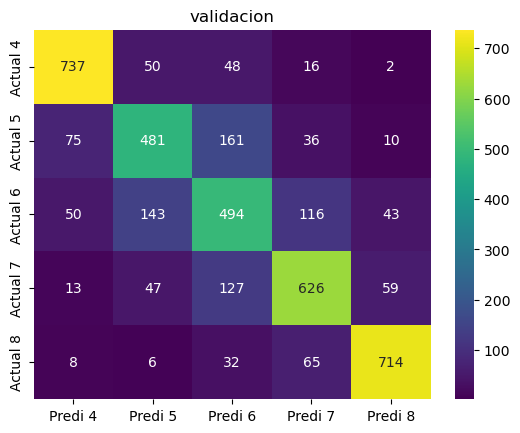

In [56]:
plot(y_val,y_pred_prueba4,"validacion")
#plt.savefig("SVCVal.eps",format='eps')

In [58]:
resultadosModelo(y_val, y_pred_prueba4)

Precisión: 0.7338302476556865
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.83      0.86      0.85       853
           5       0.66      0.63      0.65       763
           6       0.57      0.58      0.58       846
           7       0.73      0.72      0.72       872
           8       0.86      0.87      0.86       825

    accuracy                           0.73      4159
   macro avg       0.73      0.73      0.73      4159
weighted avg       0.73      0.73      0.73      4159



Precisión del modelo BaggingClassifier: 0.8076460687665304


<Axes: title={'center': 'Validacion'}>

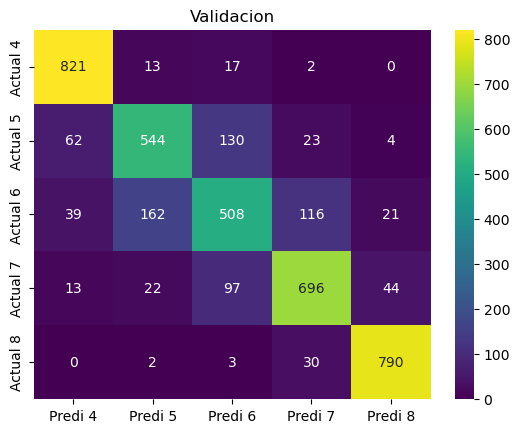

In [59]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

# MLP (Multilayer perceptron)

In [60]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(120,240,120), max_iter=10000,activation='tanh',alpha= 0.0001,)
mlp.fit(X_train, y_train)
y_pred5 = mlp.predict(X_val)
y_test5= mlp.predict(X_train)

<Axes: title={'center': 'validacion'}>

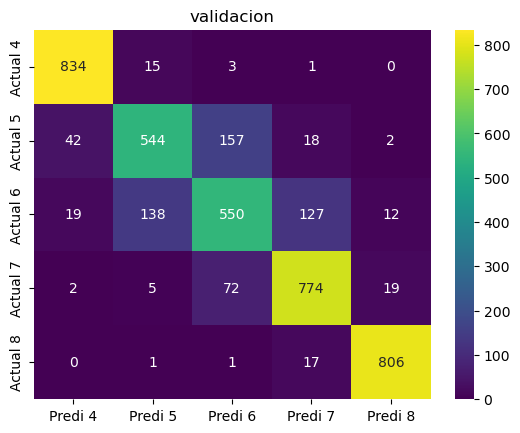

In [65]:
plot(y_val,y_pred5,"validacion")
#plt.savefig("MLPVal.eps",format='eps')

In [67]:
resultadosModelo(y_val, y_pred5)

Precisión: 0.8434719884587641
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.93      0.98      0.95       853
           5       0.77      0.71      0.74       763
           6       0.70      0.65      0.68       846
           7       0.83      0.89      0.86       872
           8       0.96      0.98      0.97       825

    accuracy                           0.84      4159
   macro avg       0.84      0.84      0.84      4159
weighted avg       0.84      0.84      0.84      4159



Precisión del modelo BaggingClassifier: 0.8076460687665304


<Axes: title={'center': 'Validacion'}>

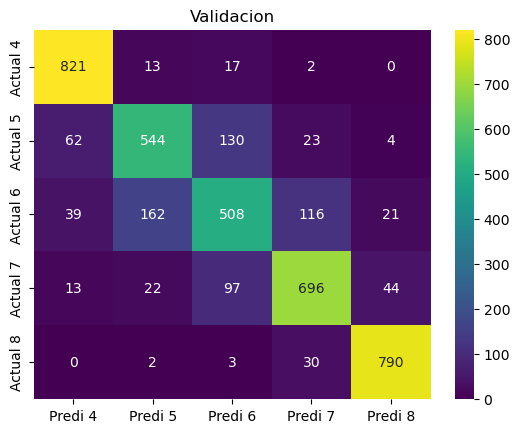

In [68]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

# STACKER

In [69]:
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=400,criterion='entropy',random_state=42)),
    ('kn', KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=1,p=1,weights='uniform')),
    ('sv', SVC(C=1,degree=1,gamma=1,kernel='rbf')),
    ('ml', MLPClassifier(hidden_layer_sizes=(120,240,120), max_iter=10000,activation='tanh')),
    ('dt', DecisionTreeClassifier(criterion='entropy',max_features='log2',min_samples_leaf=1,min_samples_split=2,splitter='random') )
]
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_val)
accuracy1 = accuracy_score(y_val, y_pred_stacking )
print(f"Precisión del modelo AdaBoost: {accuracy1}")

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del modelo AdaBoost: 0.8807405626352488


In [71]:
y_pred_stacking = stacking_classifier.predict(X_val)
y_train_stacking = stacking_classifier.predict(X_train)

<Axes: title={'center': 'Validacion'}>

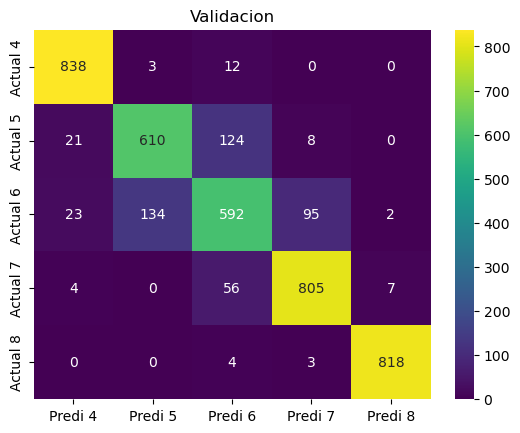

In [72]:
plot(y_val,y_pred_stacking,'Validacion')

<Axes: title={'center': 'Entrenamiento'}>

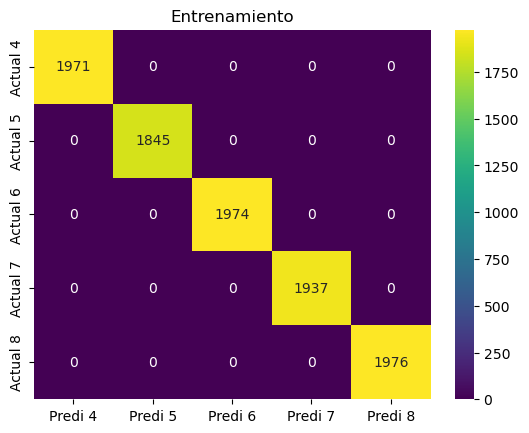

In [78]:
plot(y_train,y_train_stacking,'Entrenamiento')

In [75]:
resultadosModelo(y_val, y_pred_stacking)

Precisión: 0.8807405626352488
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.95      0.98      0.96       853
           5       0.82      0.80      0.81       763
           6       0.75      0.70      0.72       846
           7       0.88      0.92      0.90       872
           8       0.99      0.99      0.99       825

    accuracy                           0.88      4159
   macro avg       0.88      0.88      0.88      4159
weighted avg       0.88      0.88      0.88      4159



In [77]:
resultadosModelo(y_train, y_train_stacking)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00      1971
           5       1.00      1.00      1.00      1845
           6       1.00      1.00      1.00      1974
           7       1.00      1.00      1.00      1937
           8       1.00      1.00      1.00      1976

    accuracy                           1.00      9703
   macro avg       1.00      1.00      1.00      9703
weighted avg       1.00      1.00      1.00      9703

